<a href="https://colab.research.google.com/github/onostosia/heheh/blob/master/classification%20of%20images/Cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [2]:
import numpy as np
import tensorflow_datasets 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
train, m = tensorflow_datasets.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteTV37ZU/cats_vs_dogs-train.tfrecord



Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)


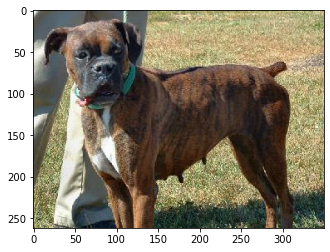

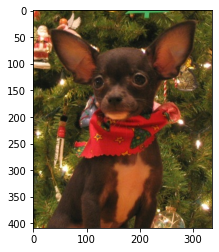

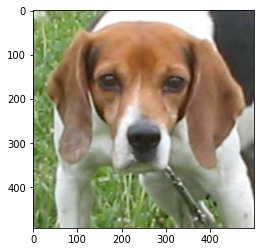

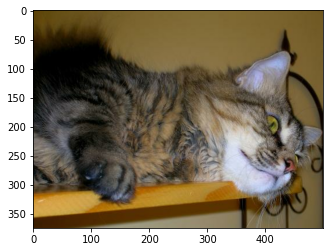

In [ ]:
for img, label in train[0].take(4):
  plt.figure()
  print(label)
  plt.imshow(img)

In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
train_image_generator

In [4]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(250, 250, 3), include_top=False) #используем готовые 
base_layers.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [7]:
def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (250, 250))
  img = img / 255.0
  return img, label


In [8]:
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [11]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

model.fit(train_batches, epochs=1)

1454/1454 [==============================] - 973s 669ms/step - loss: 0.0650 - accuracy: 0.9758


In [5]:
files.upload()

Saving кто ты.jpg to кто ты.jpg


{'кто ты.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x04\x03\x03\x04\x03\x03\x04\x04\x03\x04\x05\x04\x04\x05\x06\n\x07\x06\x06\x06\x06\r\t\n\x08\n\x0f\r\x10\x10\x0f\r\x0f\x0e\x11\x13\x18\x14\x11\x12\x17\x12\x0e\x0f\x15\x1c\x15\x17\x19\x19\x1b\x1b\x1b\x10\x14\x1d\x1f\x1d\x1a\x1f\x18\x1a\x1b\x1a\xff\xdb\x00C\x01\x04\x05\x05\x06\x05\x06\x0c\x07\x07\x0c\x1a\x11\x0f\x11\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\xff\xc0\x00\x11\x08\x02\xd0\x048\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x01\x04\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x01\x02\x04\x05\x00\x06\x07\x08\t\xff\xc4\x00C\x10\x00\x02\x01\x02\x04\x04\x04\x03\x07\x04\x02\x02\x02\x01\x01\t\x01\x02\x11\x00\x03\x04\x12!1\x05AQa\x06\x13"q\x07\x81\x91\x142\xa1\xb1\xc1\xd1\xf0#B\xe1\xf1\x08\x153R$b\x16\x17%r&C

In [6]:
files.upload()

Saving кот.jpg to кот.jpg


{'кот.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc2\x00\x11\x08\x01\xc1\x02X\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\x07\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xdc\xd5\x1f\x9f\xa1\xc9*\xe5YF\x0c\x8d\x83u\xbc\xaf>\x85js\x91\xa1\x1a\x19(\xb5\x93\xa1"\xd8\xbb\x18\x986\n\x99B\x85\x95)\xb7;MOCG\xda\xae\xc6erE\x92\x14hnB\xa6D\xcb5\x02\x05\x1dY\xca]w\x96\x8d:q\x1a\xe942\xe5d\xcc\x881\xa9\x9a\xd7\xa3\x1e\xdb\x13k8S@\x15\x8b8e*\x82\xae\xaa\x96J9t

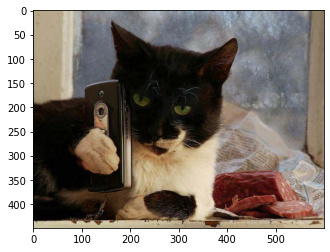

In [16]:
img = load_img('/content/кот.jpg')
plt.figure()
plt.imshow(img)


In [17]:
img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
print(prediction)

-8.738813


In [ ]:
files.upload()

In [18]:
files.upload()

Saving кто ты 1.jpg to кто ты 1.jpg
Saving мем.jpg to мем.jpg
Saving 34.png to 34.png


{'34.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x03\x00\x00\x00\xc3\xa6$\xc8\x00\x00\x02CPLTEGpL\xfa\xfa\xfa\xf7\xf7\xf6\xfd\xfd\xfc\xf7\xf7\xf6\xea\xe9\xe7\xef\xf0\xeeQQP\xf7\xf5\xec\xf9\xf9\xf9\xf9\xfa\xf9\xf9\xf9\xf9\xfd\xfd\xfd\xfc\xfc\xfc\xfd\xfd\xfd\xfb\xfb\xfb\xfc\xfc\xfc\xfc\xfd\xfc\xfb\xfc\xfb\xb8\xcb\x9b\xf6\xb8]o\x9b\xd0Sx\xb9\xf9\xb9^X\x89\xc7Qy\xb9\xfe\xfe\xfeo\x9a\xd3\xfc\xeb\xc9\xd1\x7f(Uw\xb9\xf9\xb7]p\x9c\xd2\xfe\xfd\xfcPy\xb7Ty\xba\xcf\x81)Qz\xbbRz\xb7\xff\xfd\xff\xea\xa1Hq\x9a\xd5p\x9c\xd5\xff\xff\xff\xea\xa3K\xfb\xfe\xff\\\x87\xc5\xd2\x81*X\x88\xc4n\x9b\xce\xd4\x7f)Tx\xbcY\x88\xc7Qz\xb4\xf6\xb8Z\x8cS\x1fOx\xb8X\x83\xc0\xf8\xba\\T{\xb8U\x7f\xbd\xec\xa0MNv\xb4\\\x8a\xc7\xff\xed\xcct\x9e\xda\xfa\xfe\xfb\xfe\xe9\xc9\x14\x13\x13q\x9a\xd1\x8cS%\xf5\xb6\\e\x91\xcb\xf6\xb9c\xb0=*j\x94\xcf\xf6\xfe\xffm\x99\xd2\x88T"s\x9d\xd6\xff\xfd\xf6\xe6\xa1IXx\xb3b\x8c\xc7\xfd\xbbal\x98\xcf\xfe\xfb\xff\xcc\x820[x\xab\xaa@(l\x96\xd3\xcc\x7f\'\xf2\xba\\

0.38127404


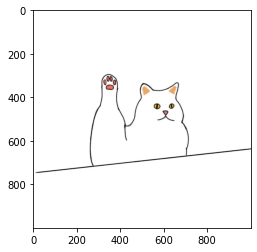

In [29]:
img1 = load_img('/content/ф.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
print(prediction)

7.4136753


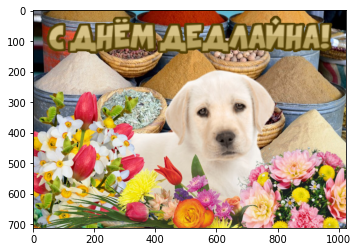

In [30]:
img1 = load_img('/content/фф.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
print(prediction)

-0.38370717


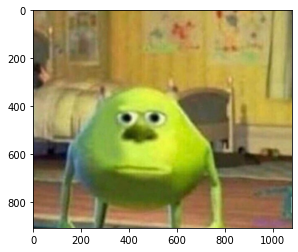

In [31]:
img1 = load_img('/content/ффф.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
print(prediction)

5.1705923


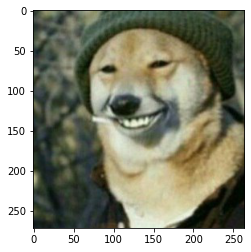

In [32]:
img1 = load_img('/content/фффф.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
print(prediction)

3.656683


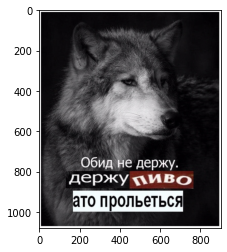

In [34]:
img1 = load_img('/content/х.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
print(prediction)

3.9882085


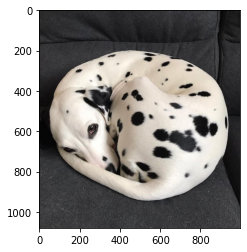

In [35]:
img1 = load_img('/content/хх.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
print(prediction)

-2.0159438


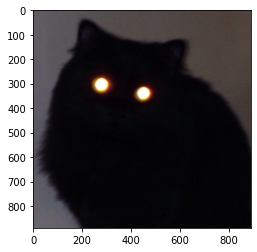

In [36]:
img1 = load_img('/content/ххх.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
print(prediction)

7.970833


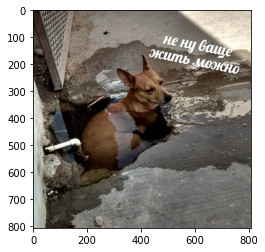

In [37]:
img1 = load_img('/content/хххх.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
print(prediction)

4.8747783


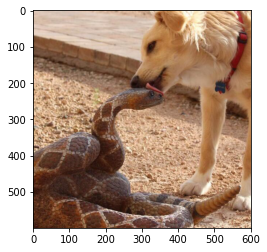

In [38]:
img1 = load_img('/content/ххххх.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
print(prediction)

1.724239


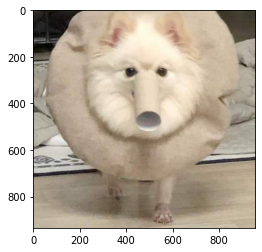

In [39]:
img1 = load_img('/content/хххххх.jpg')
plt.figure()
plt.imshow(img1)

img_array = img_to_array(img1)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
print(prediction)